#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Load Dataset

In [ ]:
df = pd.read_csv('/content/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* Harga dalam dolar Amerika Serikat ($) adalah fitur target.
* carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
* cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
* color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
* clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
* x: merepresentasikan panjang diamonds dalam mm (0-10.74).
* y: merepresentasikan lebar diamonds dalam mm (0-58.9).
* z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
* depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
* table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).

#Data Preparation

In [ ]:
df.shape

(53940, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
x = (df.x == 0).sum()
y = (df.y == 0).sum()
z = (df.z == 0).sum()

print(f'Nilai 0 di kolom x ada: {x}')
print(f'Nilai 0 di kolom y ada: {y}')
print(f'Nilai 0 di kolom z ada: {z}')

Nilai 0 di kolom x ada: 8
Nilai 0 di kolom y ada: 7
Nilai 0 di kolom z ada: 20


In [ ]:
df.loc[(df['z'] == 0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


#Cleaning Data

In [ ]:
df = df.loc[(df[['x', 'y', 'z']] != 0).all(axis = 1)]

In [ ]:
df.shape

(53920, 11)

In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df = df.drop(columns = ['Unnamed: 0'])

In [ ]:
df.shape

(53920, 10)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#Exploratory Data Analysis (EDA)

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df['cut'].value_counts()

,count
cut,
Ideal,21548
Premium,13780
Very Good,12081
Good,4902
Fair,1609


<Axes: xlabel='cut', ylabel='price'>

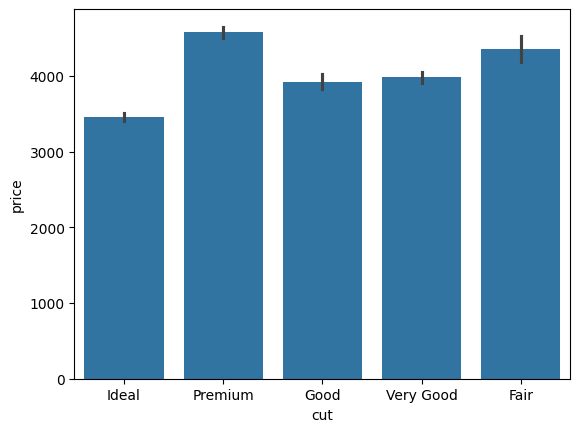

In [ ]:
sns.barplot(df, x = 'cut', y = 'price')

<Axes: xlabel='carat', ylabel='price'>

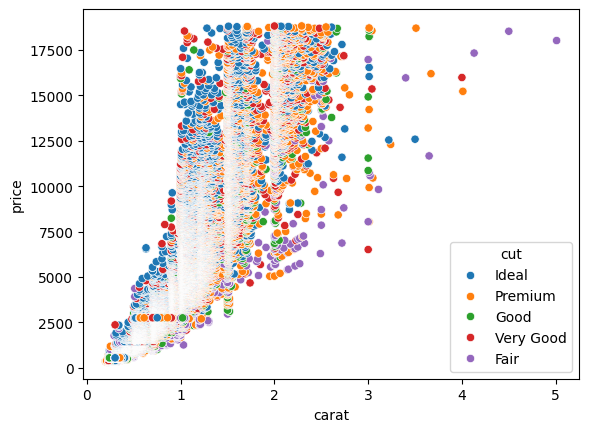

In [ ]:
sns.scatterplot(df, x = 'carat', y = 'price', hue = 'cut')

Berdasarkan barchart yang dihasilkan pertama, menunjukkan bahwa premium memiliki harga yang mahal, dan scatter plot menjawabnya. Salah satu penyebabnya karena carat yang dimiliki lebih besar sehingga harganya juga lebih mahal.

<Axes: xlabel='cut', ylabel='carat'>

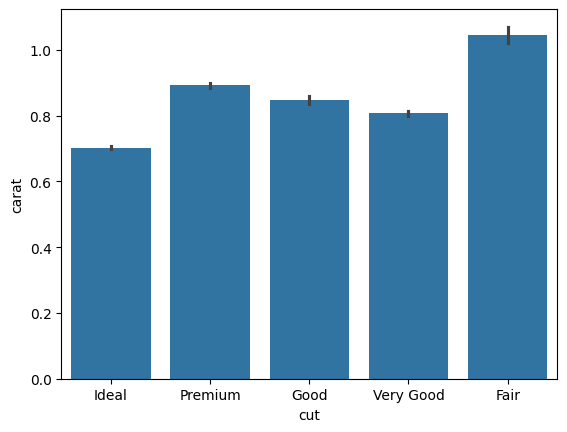

In [ ]:
sns.barplot(df, x = 'cut', y = 'carat')

In [ ]:
print(f'price paling besar : {max(df['price'])}')
print(f'price paling kecil : {min(df["price"])}')

price paling besar : 18823
price paling kecil : 326


<Axes: xlabel='carat', ylabel='price'>

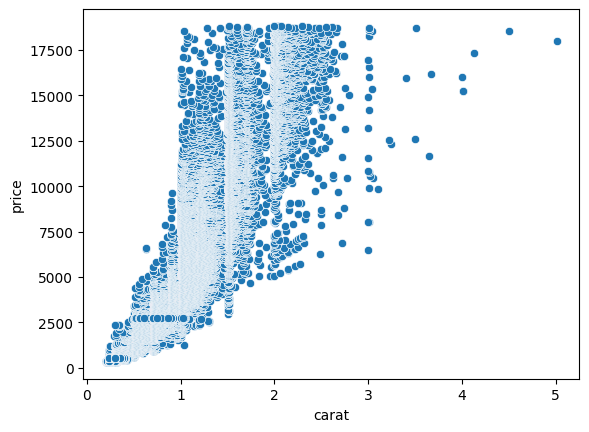

In [ ]:
sns.scatterplot(df, x = 'carat', y = 'price')

Berdasarkan scatter plot yang dilahirkan, semakin besarnya caratnya maka semakin mahal juga harganya.

In [ ]:
df['color'].value_counts()

,count
color,
G,11284
E,9797
F,9538
H,8298
D,6774
I,5421
J,2808


<Axes: xlabel='carat', ylabel='price'>

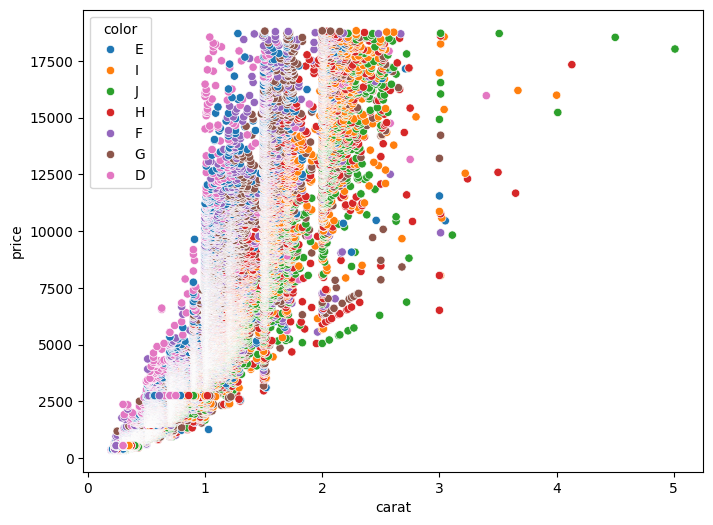

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(df, x = 'carat', y = 'price', hue = 'color')

In [ ]:
df['clarity'].value_counts()

,count
clarity,
SI1,13063
VS2,12254
SI2,9185
VS1,8170
VVS2,5066
VVS1,3654
IF,1790
I1,738


<Axes: xlabel='clarity', ylabel='price'>

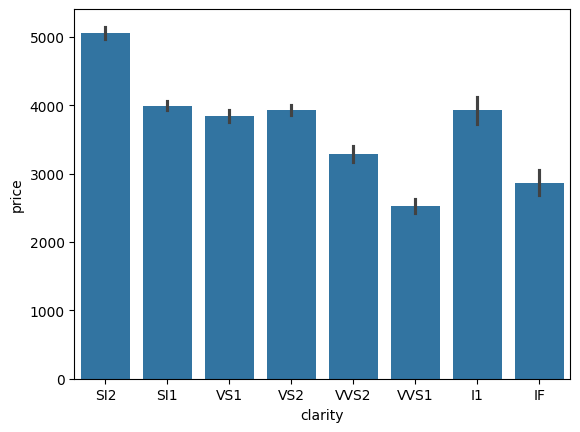

In [ ]:
sns.barplot(df, x = 'clarity', y = 'price')

<Axes: xlabel='clarity', ylabel='carat'>

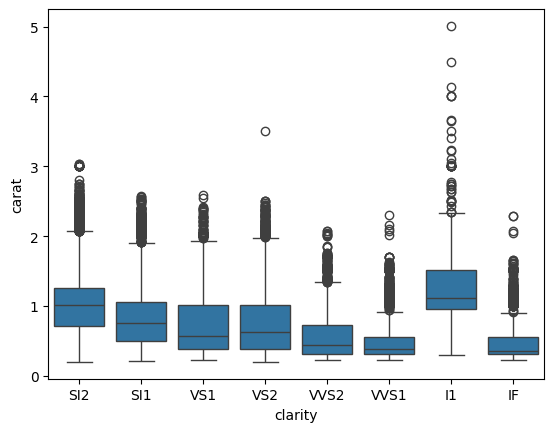

In [ ]:
sns.boxplot(df, x = 'clarity', y = 'carat')

<Axes: xlabel='carat', ylabel='price'>

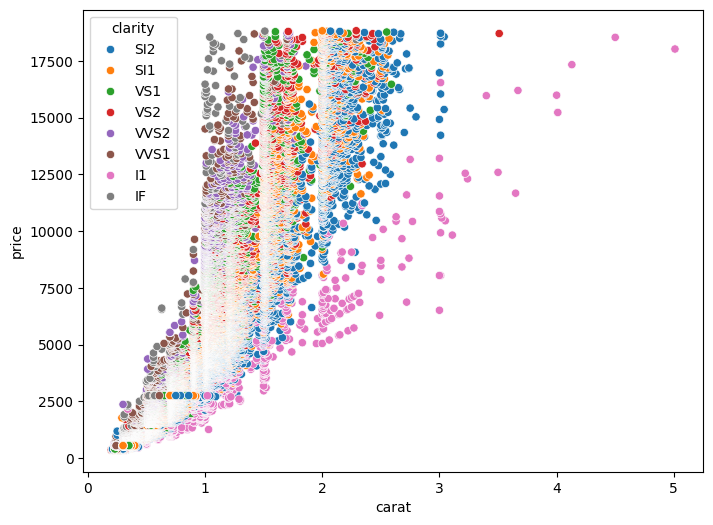

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(df, x = 'carat', y = 'price', hue = 'clarity')

#Encoding Fitur Kategori

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Setelah data sudah bersih, selanjutnya menerapkan salah satu teknik adalah teknik one-hot-encoding.

In [ ]:
df = pd.get_dummies(df, columns = ['cut', 'color', 'clarity'], prefix = ['cut', 'color', 'clarity'], drop_first= True)

In [ ]:
# data setelah encoding
df.head(10)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
5,0.24,62.8,57.0,336,3.94,3.96,2.48,False,False,False,...,False,False,True,False,False,False,False,False,False,True
6,0.24,62.3,57.0,336,3.95,3.98,2.47,False,False,False,...,False,True,False,False,False,False,False,False,True,False
7,0.26,61.9,55.0,337,4.07,4.11,2.53,False,False,False,...,True,False,False,False,True,False,False,False,False,False
8,0.22,65.1,61.0,337,3.87,3.78,2.49,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,0.23,59.4,61.0,338,4.00,4.05,2.39,False,False,False,...,True,False,False,False,False,False,True,False,False,False


#Menentukan Target

In [ ]:
x = df.drop(columns = ['price'], axis = 1) # kolom fitur
y = df['price'] # kolom targetnya

In [ ]:
x

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,5.69,5.75,3.61,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,5.66,5.68,3.56,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,6.15,6.12,3.74,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


#Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f'Total data rill : {len(x)}')
print(f'Total data train : {len(X_train)}')
print(f'Total data test : {len(X_test)}')

Total data rill : 53920
Total data train : 43136
Total data test : 10784


#Training Model

In [ ]:
#Model di latih menggunakan linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#Evaluasi Model

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

In [ ]:
print(f'MSE : {mse}')
print(f'MAE : {mae}')
print(f'R2 Score : {r2_score}')

MSE : 1290368.1265477284
MAE : 726.299856207592
R2 Score : 0.9195127194882515


#Visualization

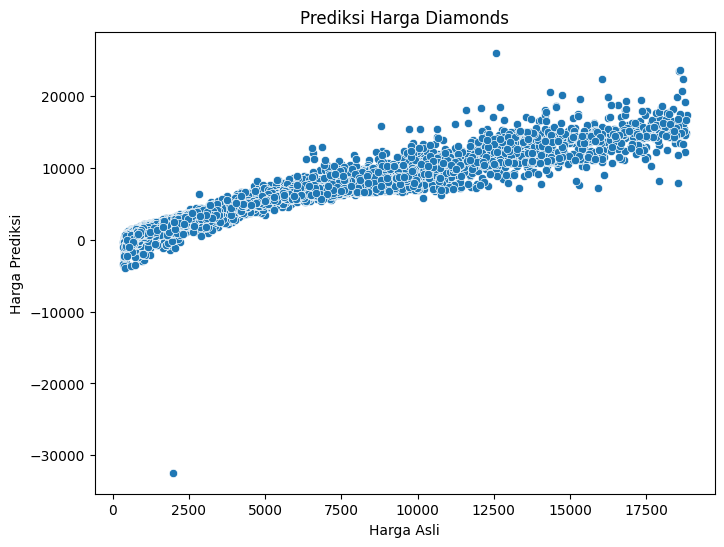

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = y_test, y = y_pred)
plt.title('Prediksi Harga Diamonds')
plt.xlabel('Harga Asli')
plt.ylabel('Harga Prediksi')
plt.show()

Beradasarkan visualisasi yang di hasilkan, menunjukkan bahwa model sudah memprediksi dengan sangat baik. Hal ini terbukti dari R-Score yang dihasilkan sebesar 91%. Scatter plot diatas menunjukkan hubungan yg kuat antara hatga asli dengan harga prediksi, dan menujukkan menyebaran yang konsisten